In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
X_train =np.loadtxt('input.csv',delimiter=',')
Y_train =np.loadtxt('input.csv',delimiter=',')

X_test =np.loadtxt('input_test.csv',delimiter=',')
Y_test =np.loadtxt('input_test.csv',delimiter=',')


In [ ]:
# Reshape image data to (num_samples, 100, 100, 3)
X_train = X_train.reshape(-1, 100, 100, 3)
X_test  = X_test.reshape(-1, 100, 100, 3)

# Labels: keep as (num_samples, 1)
Y_train = Y_train.reshape(-1, 1)
Y_test  = Y_test.reshape(-1, 1)

# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

# Fit the generator
datagen.fit(X_train)


In [8]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)


Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 30000)
Shape of X_test:  (400, 30000)
Shape of Y_test:  (400, 30000)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [6.0..250.0].


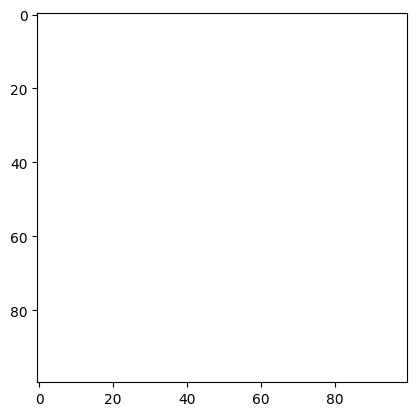

In [11]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [13]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),# we use relu to fing hidden layers

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  #we use sigmoid fro classification 
])

In [14]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation= 'relu', input_shape = (100,100,3))) # 32,64 is the filter
model.add(MaxPooling2D((2,2)))# converting 2d data to 1d data
model.add(Dropout(0.25)) # to remove particular data from the dataset

model.add(Conv2D(64, (3,3), activation= 'relu'))#(3,3) is the size of the filter( hidden layers)
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))


In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:

model.fit(datagen.flow(X_train, Y_train, batch_size=32),
          epochs=30,
          validation_data=(X_test, Y_test),
          verbose=1)

NameError: name 'datagen' is not defined

In [ ]:
model.evaluate(X_test, Y_test)


In [ ]:
idx2= random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = "dog"

else: 
    pred = 'cat'

print("The model prediction is", pred)

In [27]:
model.save('model.h5')
print('our model is saved')


our model is saved
